In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.data import imread
import matplotlib.pyplot as plt
import os
import math

In [3]:
data_dir = '../../data/airbus/'
train_dir = data_dir + 'train/'
train = os.listdir(train_dir)
print(len(train))

9571


In [4]:
# open mask package for decoding mask_rle to rotated bboxes & drawing bboxes
from masks.bbox import *

In [8]:
def plot_img_with_boxes(train_dir, image_id, img_masks):
    img_masks = img_masks.tolist()
    img_path = train_dir + image_id
    img = imread(img_path)
    fig, axarr = plt.subplots(1, 2, figsize=(15, 40))
    axarr[0].imshow(img)
    axarr[1].imshow(img)
    plt.tight_layout(h_pad=0.1, w_pad=0.1)
    
    bb = bbox()
    
    for mask in img_masks: 
        bb.from_mask(mask).plot_bbox(plt)
        
    plt.show()

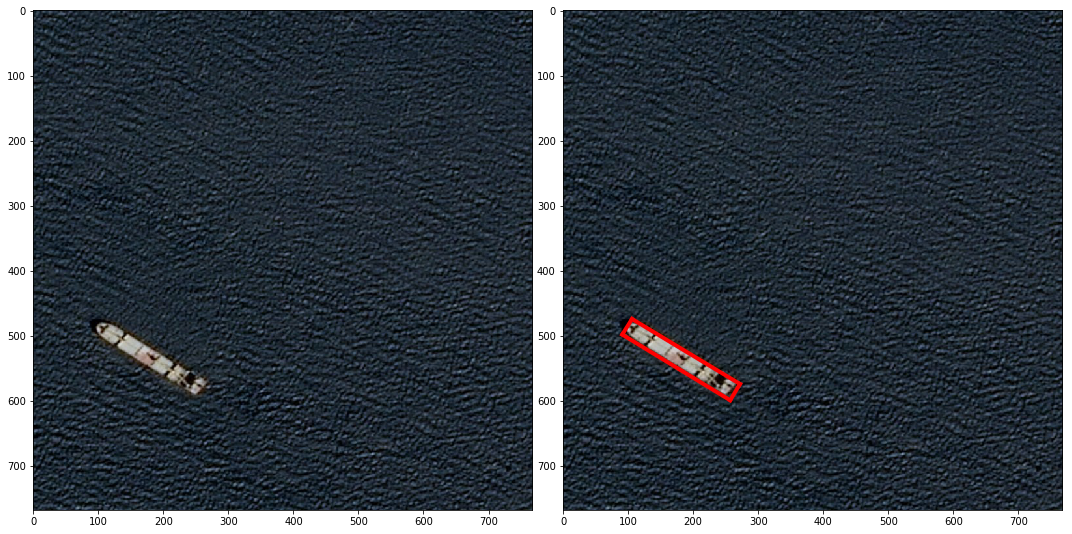

In [9]:
ImageId = '005883911.jpg'
ImageId = '0098456ff.jpg'
ImageId = '001566f7c.jpg'
# ImageId = '000155de5.jpg'
# ImageId = '00c4b4f62.jpg'
masks = pd.read_csv(data_dir + '/train_ship_segmentations.csv')
img_masks = masks.loc[masks['ImageId'] == ImageId, 'EncodedPixels']
plot_img_with_boxes(train_dir, ImageId, img_masks)